In [1]:
from glob import glob
import cv2
import os
from tqdm import tqdm
from collections import Counter
from shutil import copyfile, move
import matplotlib.pyplot as plt
import seaborn

In [2]:
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

In [3]:
classes = {  0: '셔츠/블라우스',  1: '상의/티셔츠/맨투맨',  2: '스웨터',  3: '카디건',  4: '자켓',  5: '조끼',  6: '바지',  7: '반바지',  8: '치마',  9: '코트',  10: '드레스/원피스',
  11: '점프수트',  12: '망토',  13: '안경/선글라스',  14: '모자',  15: '머리띠',  16: '넥타이',  17: '장갑',  18: '시계',  19: '벨트/허리띠',  20: '다리보온대/레그워머',
  21: '타이즈/스타킹',  22: '양말',  23: '신발',  24: '가방/지갑',  25: '스카프',  26: '우산',  27: '후드/복면',  28: '카라/깃',  29: 'laped',  30: '어깨장식(견장)',
  31: '소매',  32: '주머니/호주머니',  33: '목둘레선',  34: '버클',  35: '지퍼',  36: '아플리케',  37: '구슬/염주',  38: '보타이',  39: '꽃',  40: '술',
  41: '리본',  42: 'rivet',  43: '주름장식',  44: '스팽글',  45: '술'}

In [4]:
path = r'C:\Users\user\AIHub_seg\runs\segment\predict_night_light_30_seg'
jpg_list = glob(os.path.join(path,'*.jpg'))

txt_path = os.path.join(path, 'labels')
txt_list = os.listdir(txt_path)

seg_path = os.path.join(path, 'seg')
createDirectory(seg_path)

not_seg_path = os.path.join(path, 'not_seg')
createDirectory(not_seg_path)

video_path = r'C:\Users\user\AIHub_seg\runs\detect\predict_night'
video_names = glob(os.path.join(video_path, '*.avi'))


In [5]:
for jpg in tqdm(jpg_list):
    src = jpg[len(path)+1:]
    txt_name = src[:-4] + '.txt'
    # if txt_name in txt_list:
    #     copyfile(jpg, os.path.join(seg_path, src))
    # else:
    #     copyfile(jpg,os.path.join(not_seg_path,src))

print("총 개수 : ", len(jpg_list))
print("segment : ", len(os.listdir(seg_path)))
print("not segment : ", len(os.listdir(not_seg_path)))

100%|██████████| 24582/24582 [01:00<00:00, 404.78it/s]

총 개수 :  24582
segment :  5465
not segment :  19117


## 영상마다 폴더 분류 ( 주석처리 할 것 )

In [6]:
# for avi in video_names:
#     tmp = avi[len(video_path)+1:-4]
#     print(tmp)
#     des_path = os.path.join(path, tmp)
#     createDirectory(des_path)
#     for jpg in jpg_list:
#         if tmp in jpg:
#             copyfile(jpg, os.path.join(des_path, jpg[len(path)+1:]))
    

2021-09-05_20-18-00_sun_sunny_out_sa-bt_C0091
2021-09-05_21-45-00_sun_sunny_out_sa-bt_C0091
2021-09-06_21-39-00_mon_sunny_out_sa-bt_C0091
2021-09-06_21-45-00_mon_sunny_out_sa-bt_C0091
2021-09-06_21-54-00_mon_sunny_out_sa-bt_C0091
2021-09-06_23-03-00_mon_sunny_out_sa-bt_C0091
2021-09-07_21-21-00_tue_sunny_out_sa-bt_C0091
2021-09-07_22-00-00_tue_sunny_out_sa-bt_C0091
2021-09-07_23-24-00_tue_sunny_out_sa-bt_C0091
2021-09-08_20-36-00_wed_sunny_out_sa-bt_C0091
2021-09-08_21-24-00_wed_sunny_out_sa-bt_C0091
2021-09-09_20-00-00_thu_sunny_out_sa-bt_C0091
2021-09-09_20-21-00_thu_sunny_out_sa-bt_C0091
2021-09-09_20-27-00_thu_sunny_out_sa-bt_C0091
2021-09-09_21-36-00_thu_sunny_out_sa-bt_C0091
2021-09-09_21-45-00_thu_sunny_out_sa-bt_C0091
2021-09-09_22-03-00_thu_sunny_out_sa-bt_C0091
2021-09-09_22-27-00_thu_sunny_out_sa-bt_C0006
2021-09-09_22-27-00_thu_sunny_out_sa-bt_C0091
2021-09-09_23-18-00_thu_sunny_out_sa-bt_C0006
2021-09-09_23-33-00_thu_sunny_out_sa-bt_C0006
2021-09-09_23-33-00_thu_sunny_out_

# histogram

In [7]:
def h_w_make(img_list):
    h_list = []
    w_list = []
    for img in img_list:
        src = cv2.imread(img)
        h, w = src.shape[:2]
        h_list.append(h)
        w_list.append(w)
    return h_list, w_list

In [8]:
seg_list = glob(os.path.join(seg_path, '*.jpg'))
not_seg_list = glob(os.path.join(not_seg_path, '*.jpg'))

seg_h_list, seg_w_list = h_w_make(seg_list)
not_seg_h_list, not_seg_w_list = h_w_make(not_seg_list)


In [9]:
seg_h_min = min(seg_h_list)
seg_h_max = max(seg_h_list)
seg_h_mean = sum(seg_h_list) / len(seg_h_list)
seg_w_min = min(seg_w_list)
seg_w_max = max(seg_w_list)
seg_w_mean = sum(seg_w_list) / len(seg_w_list)

print('\nSegment')
print('h_min : ', seg_h_min)
print('h_max : ', seg_h_max)
print('h_mean : ', round(seg_h_mean,2))
print('w_min : ', seg_w_min)
print('w_max : ', seg_w_max)
print('w_mean : ', round(seg_w_mean,2))

not_seg_h_min = min(not_seg_h_list)
not_seg_h_max = max(not_seg_h_list)
not_seg_h_mean = sum(not_seg_h_list) / len(not_seg_h_list)
not_seg_w_min = min(not_seg_w_list)
not_seg_w_max = max(not_seg_w_list)
not_seg_w_mean = sum(not_seg_w_list) / len(not_seg_w_list)

print("\nNot Segment")
print('h_min : ', not_seg_h_min)
print('h_max : ', not_seg_h_max)
print('h_mean : ', round(not_seg_h_mean,2))
print('w_min : ', not_seg_w_min)
print('w_max : ', not_seg_w_max)
print('w_mean : ', round(not_seg_w_mean,2))


Segment
h_min :  95
h_max :  398
h_mean :  242.11
w_min :  41
w_max :  242
w_mean :  107.79

Not Segment
h_min :  33
h_max :  409
h_mean :  126.45
w_min :  21
w_max :  220
w_mean :  59.68


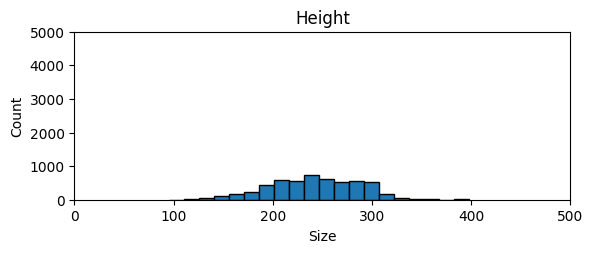

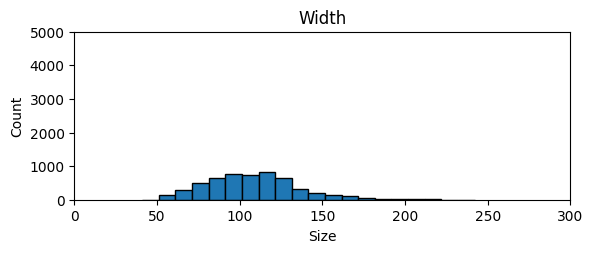

In [10]:
plt.subplot(2,1,1)
plt.hist(seg_h_list, bins=20, edgecolor='black')
plt.title('Height')
plt.xlabel('Size')
plt.ylabel('Count')
plt.axis([0, 500, 0, 5000])   # plt.axis([0, 1000, 0, 10000])
plt.show()

plt.subplot(2,1,2)
plt.hist(seg_w_list, bins=20, edgecolor='black')
plt.title('Width')
plt.xlabel('Size')
plt.ylabel('Count')
plt.axis([0, 300, 0, 5000])    # plt.axis([0, 1000, 0, 10000])
plt.show()

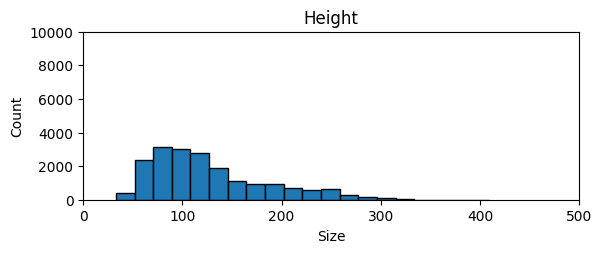

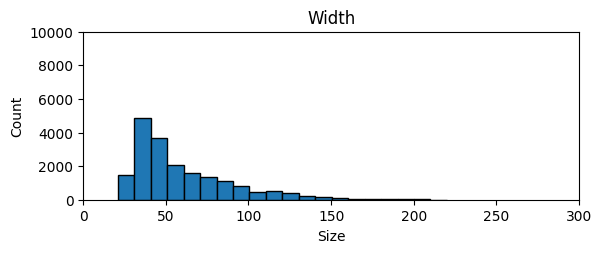

In [11]:
plt.subplot(2,1,1)
plt.hist(not_seg_h_list, bins=20, edgecolor='black')
plt.title('Height')
plt.xlabel('Size')
plt.ylabel('Count')
plt.axis([0, 500, 0, 10000])   # plt.axis([0, 1000, 0, 30000])
plt.show()

plt.subplot(2,1,2)
plt.hist(not_seg_w_list, bins=20, edgecolor='black')
plt.title('Width')
plt.xlabel('Size')
plt.ylabel('Count')
plt.axis([0, 300, 0, 10000])   # plt.axis([0, 1000, 0, 30000])
plt.show()